# Tutorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
visits = [2024110800245, 2024110800246, 2024110800247, 2024110800248, 2024110800249, 2024110800250, 2024110800251, 2024110800252, 2024110800253, 2024110800254]
detectors = [1, 1, 2, 2, 2, 2, 5, 5, 5, 5]

In [4]:
%%time
import neandertools as nt

svc = nt.cutouts_from_butler("dp1", collections=["LSSTComCam/runs/DRP/DP1/DM-51335"])
images = svc.cutout(visit=visits, detector=detectors, ra=53, dec=-27.91, h=201, w=201)

CPU times: user 446 ms, sys: 181 ms, total: 627 ms
Wall time: 3.71 s


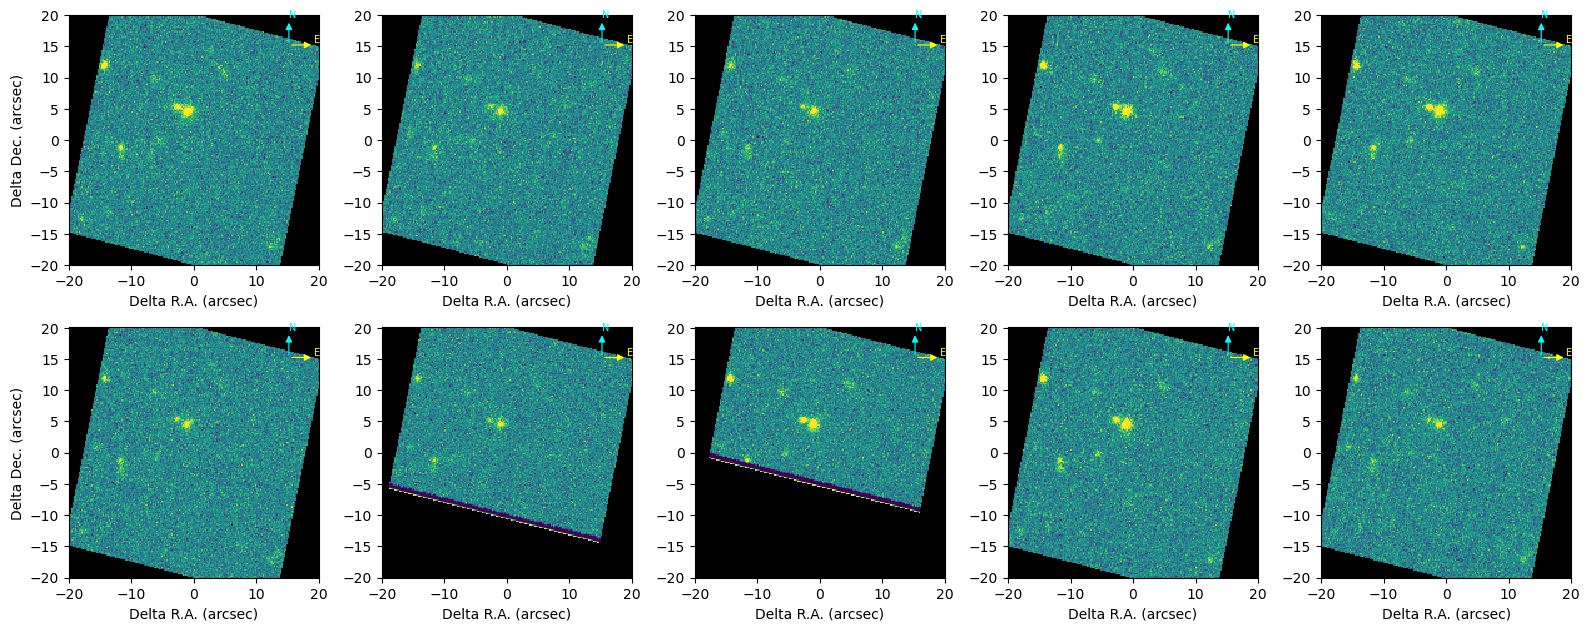

In [5]:
nt.cutouts_grid(images, qmin=0.003, qmax=0.998, match_noise=True, warp_common_grid=True, show_ne_indicator=True, cmap="viridis");

In [ ]:
nt.cutouts_gif(
    images,
    output_path="cutouts.gif",
    qmin=0.003,
    qmax=0.998,
    match_background=True,
    match_noise=False,
    warp_common_grid=True,
    frame_duration_ms=1000,
    title_fontsize=12,
    show_ne_indicator=True
)

from IPython.display import Image, display
# display(Image(filename="cutouts.gif"))

In [14]:
import trackbuilder as tb
import imagefinder
import lsst.geom as geom
import lsst.afw.image as afwimage
import numpy as np
from astropy.time import Time
import os
 import imagebuilder

from PIL import Image
import glob

In [2]:
eph = tb.query_ephemeris(target="2024 TN57", target_type="smallbody", start="2024-12-01", end="2024-12-21", step="12h" )

In [3]:
eph["times"].jd

array([2460645.5, 2460646. , 2460646.5, 2460647. , 2460647.5, 2460648. ,
       2460648.5, 2460649. , 2460649.5, 2460650. , 2460650.5, 2460651. ,
       2460651.5, 2460652. , 2460652.5, 2460653. , 2460653.5, 2460654. ,
       2460654.5, 2460655. , 2460655.5, 2460656. , 2460656.5, 2460657. ,
       2460657.5, 2460658. , 2460658.5, 2460659. , 2460659.5, 2460660. ,
       2460660.5, 2460661. , 2460661.5, 2460662. , 2460662.5, 2460663. ,
       2460663.5, 2460664. , 2460664.5, 2460665. , 2460665.5])

In [4]:
polygon = tb.calculate_polygons(times=eph["times"], ra_deg=eph["ra_deg"], dec_deg=eph["dec_deg"] )

In [5]:
polygon[0]

{'time_start': np.float64(2460645.5),
 'time_end': np.float64(2460648.5),
 'polygon_corners': [(np.float64(38.35827863932879),
   np.float64(6.090538994604832)),
  (np.float64(37.869549306367674), np.float64(6.308634468845617)),
  (np.float64(37.86909105565403), np.float64(6.307621004810057)),
  (np.float64(38.35782057804211), np.float64(6.089525530569273))]}

In [6]:
images = imagefinder.find_overlapping_images(polygons=polygon, bands=["u", "g", "r", "i", "z", "y"]  )

In [7]:
images[0]

DatasetRef(DatasetType('visit_image', {band, instrument, day_obs, detector, physical_filter, visit}, ExposureF), {instrument: 'LSSTComCam', detector: 3, visit: 2024120700156, band: 'z', day_obs: 20241207, physical_filter: 'z_03'}, run='LSSTComCam/runs/DRP/DP1/DM-53601', id=019b197f-4ba1-7c43-beb6-d1f8ac58b9fc)

In [8]:
visitid = images[0].dataId["visit"]
detector = images[0].dataId["detector"]

t_mid = imagefinder.get_obs_time(visit_id=visitid, detector_id=detector)

In [9]:
time_grid = eph["times"].tai.mjd


In [10]:
ra, dec =imagefinder.interpolate_position(obs_time_mjd=t_mid.value, ephem_times_mjd=time_grid, ra_deg=eph["ra_deg"], dec_deg=eph["dec_deg"]  )

In [11]:
butler = Butler("dp1", collections= "LSSTComCam/DP1")

os.makedirs("./output", exist_ok=True)
try:
        exposure = butler.get(
            "visit_image",
            dataId={"visit": visitid, "detector": detector},
        )
except Exception as e:
    print(f"Skipping visit={visitid} det={detector}: {e}")


In [12]:
cutout = imagefinder.create_cutout(exposure, ra, dec )

In [20]:
imagebuilder.cutout_to_png(cutout_exposure=cutout, output_path="./output/", title="cutout.png")

Saved in ./output/


In [16]:
!pwd


/home/laszlo-szigeti/work2/neandertools
